In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import imageio
im = imageio.imread('LAS_18258650.las.png')

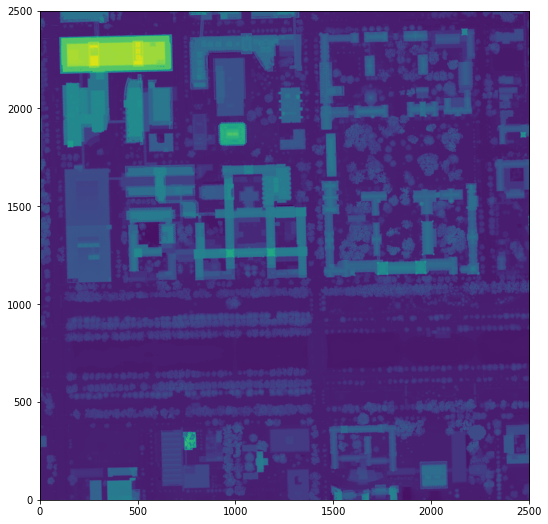

In [6]:
plt.figure(figsize=(9,9))
plt.imshow(im.T, origin="lower")

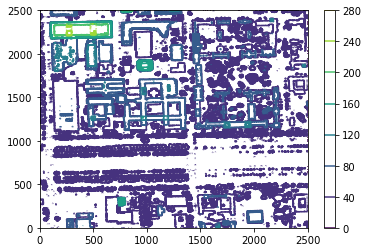

In [8]:
plt.contour(np.arange(im.shape[0]), np.arange(im.shape[1]), im.T)
plt.colorbar()

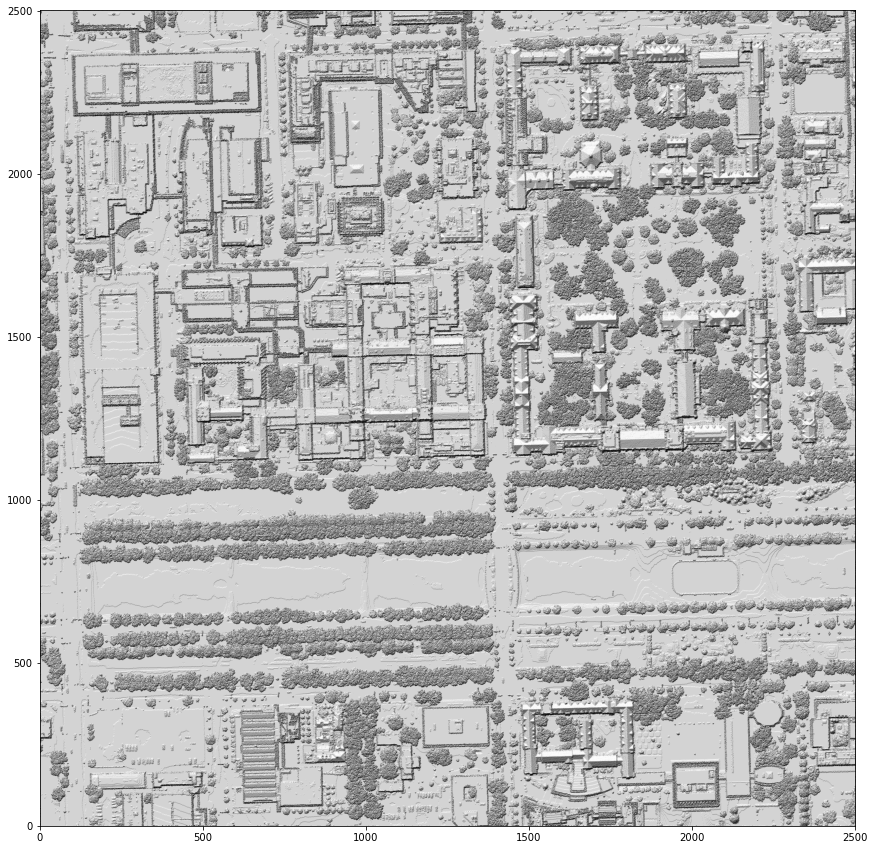

In [9]:

# There is an approach for coloring topographic data called "hillshading"
# that I can use...

fig, axs = plt.subplots(figsize=(15,15))
ve=1
from matplotlib.colors import LightSource
ls = LightSource(azdeg=200, altdeg=45
                )
axs.imshow(ls.hillshade(im.T, vert_exag=ve), cmap='gray', origin="lower")


In [22]:
# But a few moments playing shows that this is a calculation based 
# on a [numerical] estimate of the slope at each point; a function
# of the angle between the sun and the local slope gives the brightness.

# Conspicuously, those aren't shadows, they are shaded sides of 
# buildings facing away from the light source.  There are no shadows. 
# And the sun is in the North, which doesn't happen midday.  


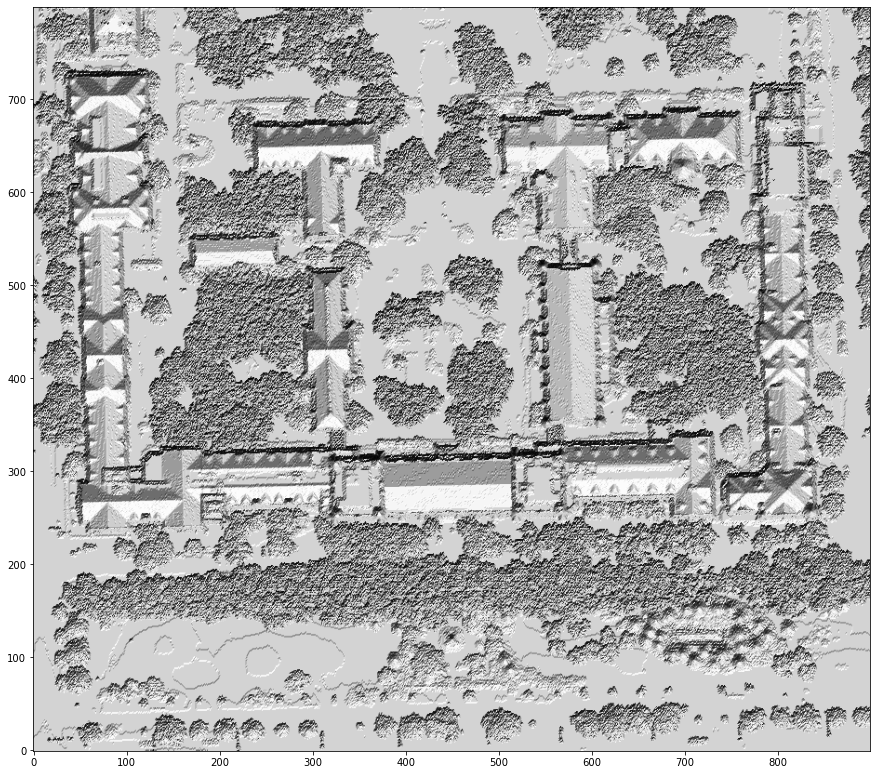

In [10]:
# If I'm biting off more than I can chew.. 
quad = im[1400:2300, 900:1700].T
fig, axs = plt.subplots(figsize=(15,15))
ve=1
from matplotlib.colors import LightSource
ls = LightSource(azdeg=20, altdeg=45
                )
axs.imshow(ls.hillshade(quad, vert_exag=ve), cmap='gray', origin="lower")


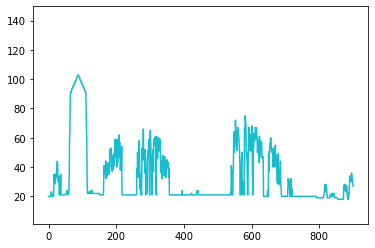

In [11]:
# Taking a clue from https://www.kdnuggets.com/2019/05/animations-with-matplotlib.html 
# Celluloid will render a bunch of plots with the same scale and animate them 

from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)
for i in range(0,quad.shape[0], 2):
    plt.plot(quad[i,:])
    camera.snap()
animation = camera.animate()
animation.save('celluloid_minimal2.gif', writer = 'imagemagick')




(800, 900)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 800 and the array at index 1 has size 900

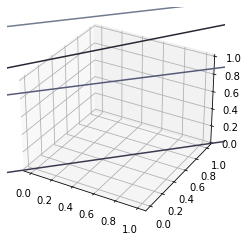

In [12]:
# I am beginn

X, Y = np.meshgrid(np.arange(quad.shape[0]), np.arange(quad.shape[1]))
Z=quad
df = pd.DataFrame  ( {
    "X": np.ravel(X),
    "Y": np.ravel(Y),
    "Z": np.ravel(Z),
})

fig = plt.figure()
ax = plt.axes(projection='3d')
X= np.arange(quad.shape[0])
Y = np.arange(quad.shape[1])
print(quad.shape)
ax.contour3D(X,Y,Z.T, 50, cmap='bone')

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(np.arange(im.shape[0]), np.arange(im.shape[1]), im.T, 50, cmap='viridis')

In [ ]:
# https://www.kdnuggets.com/2019/05/animations-with-matplotlib.html

# library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
X, Y = np.meshgrid(np.arange(im.shape[0]), np.arange(im.shape[1]))
#df=im.T.unstack().reset_index()

In [ ]:
X.shape

In [ ]:
X, Y = np.meshgrid(np.arange(im.shape[0]), np.arange(im.shape[1]))
Z=im
df = pd.DataFrame  ( {
    "X": np.ravel(X),
    "Y": np.ravel(Y),
    "Z": np.ravel(Z),
})

In [ ]:
Z=im.T
df = pd.DataFrame  ( {
    "X": np.ravel(X[::10]),
    "Y": np.ravel(Y[::10]),
    "Z": np.ravel(Z[::10]),
})

In [ ]:
for angle in range(70,72,2):
#    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

    ax.view_init(30,angle)
    filename='Campus'+":%03d".format(angle)+'.png'
    print("Saving", filename)
    plt.show()
    plt.savefig(filename, dpi=96)
plt.gca()


In [ ]:
angle=30
ax = fig.gca(projection='3d')
ax.plot_surface(df["X"], df['Y'], im, cmap=plt.cm.viridis, linewidth=0.2)
ax.view_init(30,angle)